<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

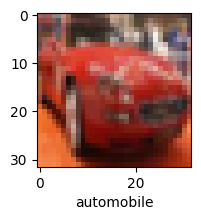

In [23]:
plot_sample(X_train, y_train, 5)

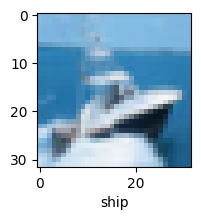

In [24]:
plot_sample(X_train, y_train, 8)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4647 - accuracy: 0.4746
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0897 - accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9635 - accuracy: 0.6659
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8854 - accuracy: 0.6954
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8188 - accuracy: 0.7172
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7605 - accuracy: 0.7374
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7142 - accuracy: 0.7512
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6746 - accuracy: 0.7647
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6353 - accuracy: 0.7778
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9330 - accuracy: 0.6973


[0.933007538318634, 0.6973000168800354]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.42749178e-03, 3.35386692e-04, 1.32708170e-03, 9.46726382e-01,
        5.45469869e-04, 4.13476005e-02, 6.88893395e-03, 1.28917192e-04,
        8.89415795e-04, 3.83386679e-04],
       [6.04333181e-04, 2.53231656e-02, 1.64121484e-05, 5.17768349e-05,
        2.07830999e-05, 1.86649700e-07, 1.28802236e-09, 1.42220392e-06,
        9.58306551e-01, 1.56752858e-02],
       [3.76112084e-03, 1.44134209e-01, 1.36086979e-04, 4.26930375e-04,
        1.18792581e-03, 8.45026352e-06, 1.37357847e-06, 1.26167957e-03,
        7.36893713e-01, 1.12188600e-01],
       [9.07607138e-01, 1.25922393e-02, 7.57481204e-04, 1.05445588e-03,
        5.18380490e-04, 7.64128254e-06, 5.62383138e-05, 6.84216843e-07,
        7.70932809e-02, 3.12451011e-04],
       [5.09690608e-07, 1.08601875e-04, 8.23750347e-03, 1.00813240e-01,
        3.39381218e-01, 3.73690319e-03, 5.47700882e-01, 3.43203254e-07,
        1.60756917e-05, 4.64618233e-06]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

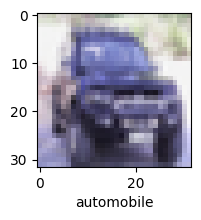

In [25]:
plot_sample(X_test, y_test,9)

In [26]:
classes[y_classes[9]]

'automobile'

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.83      0.80      0.81      1000
           2       0.58      0.59      0.59      1000
           3       0.54      0.52      0.53      1000
           4       0.66      0.62      0.64      1000
           5       0.71      0.47      0.57      1000
           6       0.71      0.84      0.77      1000
           7       0.73      0.76      0.74      1000
           8       0.83      0.76      0.79      1000
           9       0.67      0.88      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

